# Show_OLP_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import package_DBR
from package_DBR import myRound

# Load data

In [2]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_copy.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


# Plot cleaned data

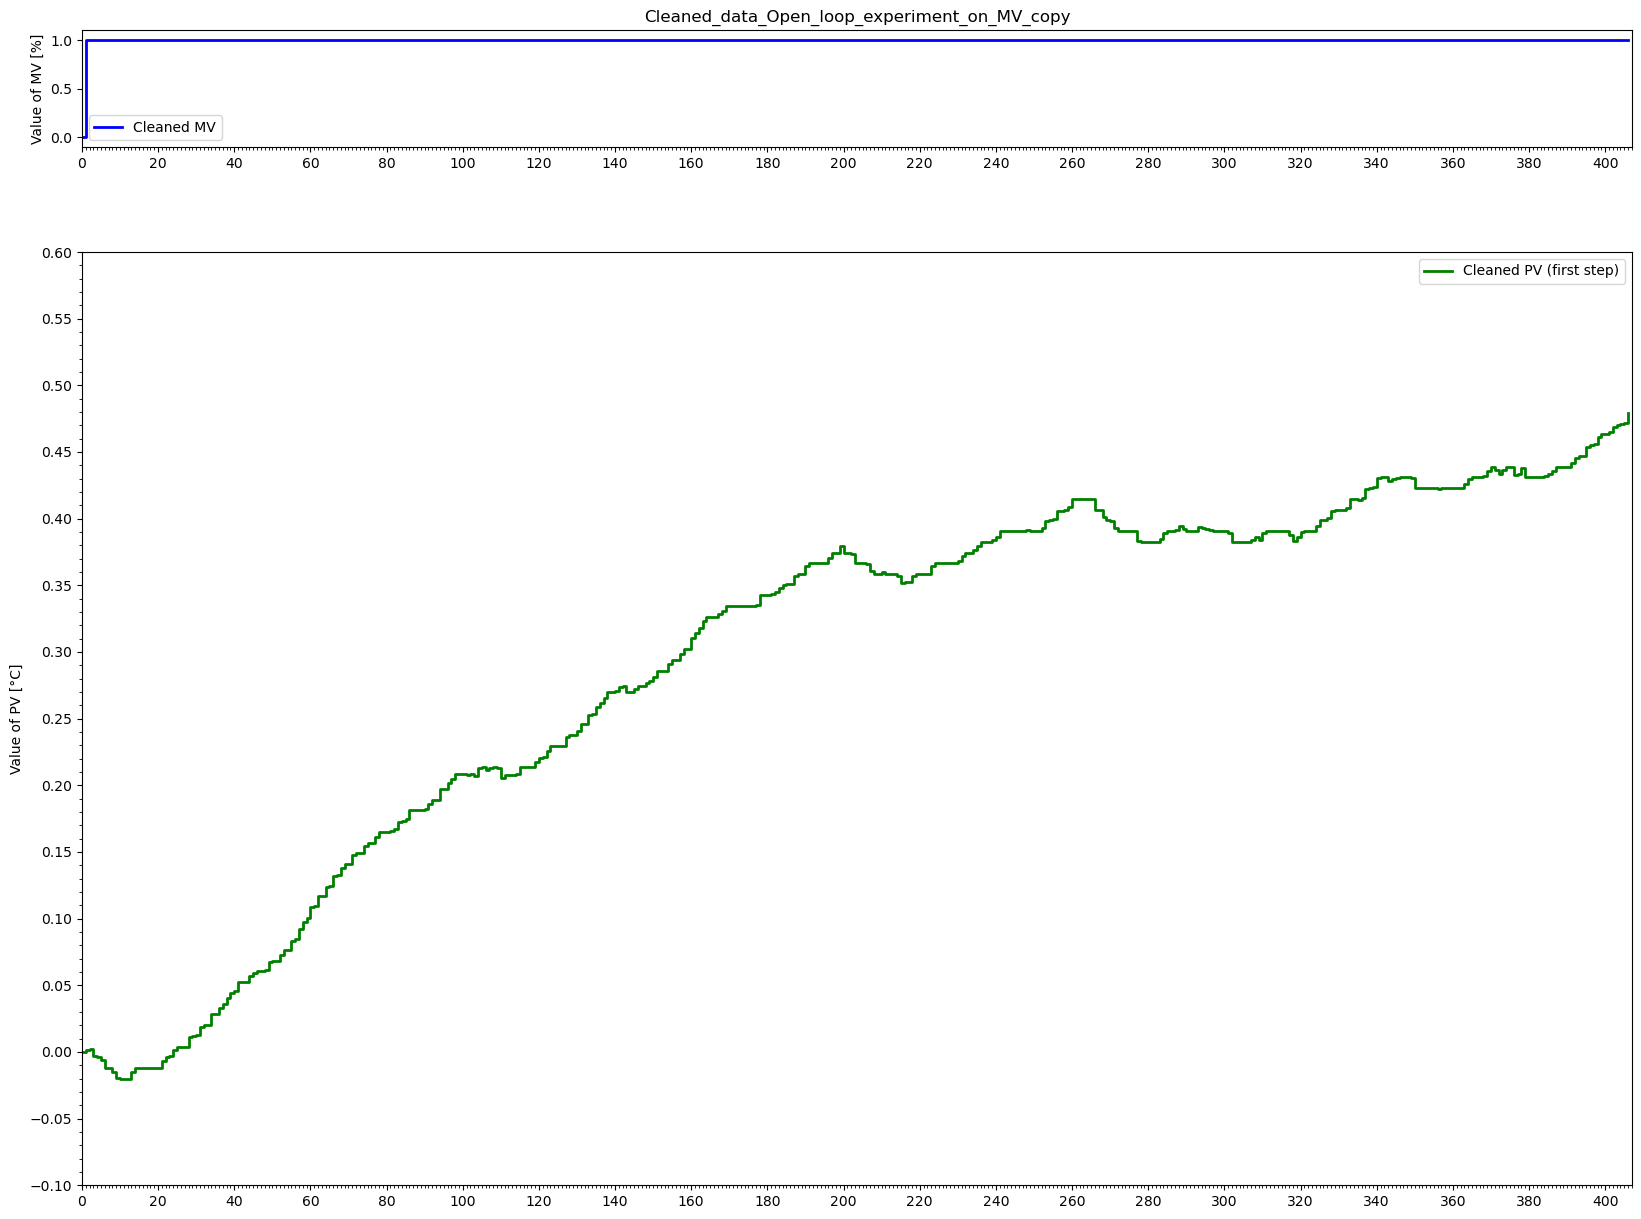

In [3]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 8]})
fig.set_figheight(15)
fig.set_figwidth(20)

if ExpVariable == 'MV':
    Index = np.where(np.diff(MVm) != 0)[0]
    if Index[-1] != 0:
        MVm = MVm[0:Index[-1]]
        PVm = PVm[0:Index[-1]]
        tm = tm[0:Index[-1]]    
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    Index = np.where(np.diff(DVm) != 0)[0]
    if Index[-1] != 0:    
        DVm = DVm[0:Index[-1]]
        PVm = PVm[0:Index[-1]]
        tm = tm[0:Index[-1]]     
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1) 

l2, = ax2.step([0,1],[0,1],'g-',linewidth=2,label='Cleaned PV (first step)',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, tm[-1]+1)
ax2.set_xlim(0, tm[-1]+1)

# Axis minor and major ticks
multiplier = 20
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_major_locator(locator)    
ax2.xaxis.set_major_locator(locator)

multiplier = 1
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_minor_locator(locator)    
ax2.xaxis.set_minor_locator(locator)    
    
multiplier = 0.05
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_major_locator(locator)
    
multiplier = 0.01
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_minor_locator(locator)

if not os.path.exists('Plots'):
    os.makedirs('Plots')

plt.savefig('Plots\Graphical_methods_' + titleName + '.png',transparent=True)
plt.savefig('Plots\Graphical_methods_' + titleName + '.pdf',transparent=True) 